In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\SRK\Desktop\siva_python\classification\day3\SMSSpamCollection.csv')

In [3]:
df.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.Class = df.Class.map({'spam':1,'ham':0})

In [6]:
y = df['Class']
x = df.sms

In [7]:
x.shape

(5572,)

In [8]:
df.Class.value_counts(normalize=True)

0    0.865937
1    0.134063
Name: Class, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
coun = CountVectorizer(stop_words='english')

In [11]:
X_traint = coun.fit_transform(X_train)
X_testt = coun.transform(X_test)

In [35]:
X_traint.shape

(3900, 6904)

In [36]:
fn =coun.get_feature_names()

In [39]:
dd =pd.DataFrame(X_traint,columns=np.transpose(fn)).head()
dd

ValueError: Shape of passed values is (3900, 1), indices imply (3900, 6904)

In [14]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report

accuracy score on train 0.9869230769230769
AxesSubplot(0.125,0.125;0.62x0.755)
auc_roc_score is  0.9979056735492229


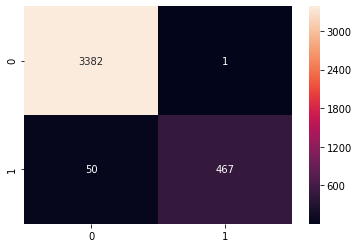

In [16]:
bnb.fit(X_traint,y_train)
ytrain_prob = bnb.predict_proba(X_traint)[:,1]
ytrainpred = bnb.predict(X_traint)
print('accuracy score on train',accuracy_score(y_train,ytrainpred))
print(sns.heatmap(confusion_matrix(y_train,ytrainpred),annot =True,fmt ='g'))
print('auc_roc_score is ',roc_auc_score(y_train,ytrain_prob))

accuracy score on test 0.9730861244019139
AxesSubplot(0.125,0.125;0.62x0.755)
auc_roc_score_test is  0.9963155038292226


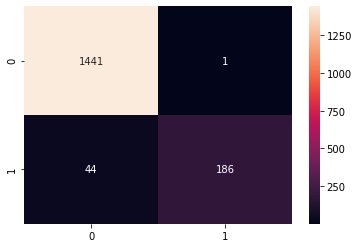

In [17]:
ytest_prob = bnb.predict_proba(X_testt)[:,1]
ytestpred = bnb.predict(X_testt)
print('accuracy score on test',accuracy_score(y_test,ytestpred))
print(sns.heatmap(confusion_matrix(y_test,ytestpred),annot =True,fmt ='g'))
print('auc_roc_score_test is ',roc_auc_score(y_test,ytest_prob))

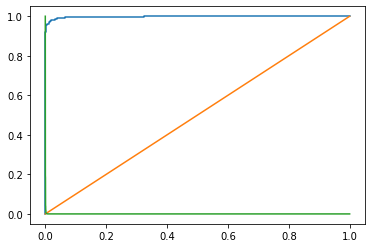

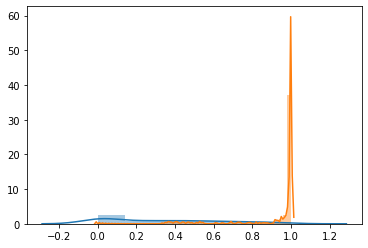

In [18]:
fpr, tpr, thresholds = roc_curve(y_train, ytrain_prob)
thresholds[0] = thresholds[0]-1
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.plot(fpr,thresholds)
plt.show()
sns.distplot(fpr)
sns.distplot(tpr)



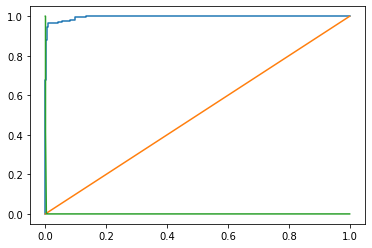

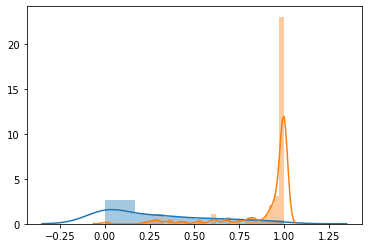

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, ytest_prob)
thresholds[0] = thresholds[0]-1
plt.plot(fpr,tpr)
plt.plot(fpr,fpr)
plt.plot(fpr,thresholds)
plt.show()
sns.distplot(fpr)
sns.distplot(tpr)
